In [1]:
# pip install tueplots

In [2]:
# from tueplots import bundles, axes
# plt.rcParams.update({"figure.dpi": 150})

In [13]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from utils.data_generator import DataGenerator
from utils.myutils import Utils
import matplotlib.pyplot as plt
import random
import json
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr

#sns.set_theme(rc={"figure.dpi": 100, "figure.figsize": (6, 3.75)})
utils = Utils()
import time

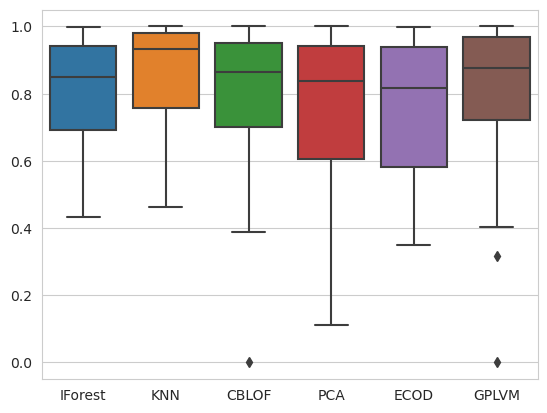

In [66]:
df_normal_adbench = pd.read_json("experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_normal.json")
sns.boxplot(df_normal_adbench)
None

# Normal

In [57]:
df_normal = pd.read_json(
    "experiments/complete/gplvm/000_gplvm_normal_01_results.json"
)
df_normal.head(2)

,dataset,n_samples,n_features,n_anomaly,pct_anomaly,domain,kernel,batch_size,learning_rate,loss,...,n_epochs,negative_elbo,train_loss_curve,val_auc_roc,val_auc_pr,test_auc_roc,test_auc_pr,training_time,inference_time,val_reconstruct_error
0,01_ALOI,49534,27,1508,3.04,Image,matern_1_2,128,0.01,normal,...,1000,40.345650,"[63.9684906006, 51.585559845, 54.2636070251, 5...",0.586886,0.040274,0.48492,0.037249,58.103476,0.019563,0.893753
1,01_ALOI,49534,27,1508,3.04,Image,matern_1_2,128,0.01,normal,...,1000,38.998085,"[56.6532325745, 51.5419540405, 52.7635574341, ...",0.562689,0.038603,0.47832,0.036916,37.552020,0.015118,0.824510


In [58]:
df_normal.columns

Index(['dataset', 'n_samples', 'n_features', 'n_anomaly', 'pct_anomaly',
       'domain', 'kernel', 'batch_size', 'learning_rate', 'loss',
       'anomaly_type', 'noise_type', 'noise_ratio', 'latent_dim', 'layers',
       'n_inducing', 'n_epochs', 'negative_elbo', 'train_loss_curve',
       'val_auc_roc', 'val_auc_pr', 'test_auc_roc', 'test_auc_pr',
       'training_time', 'inference_time', 'val_reconstruct_error'],
      dtype='object')

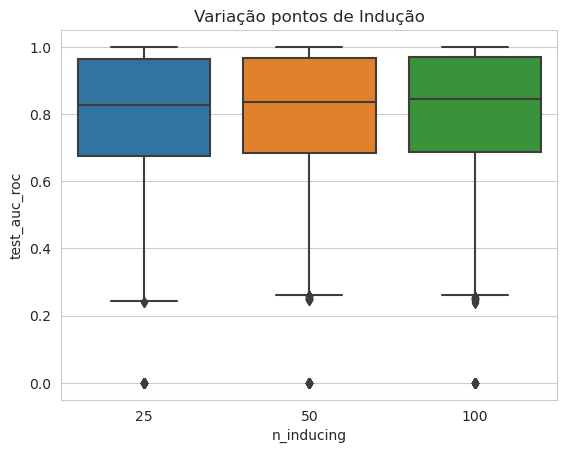

In [62]:
s = sns.boxplot(data=df_normal, y = "test_auc_roc", x = "n_inducing")
s.set_title("Variação pontos de Indução")
None

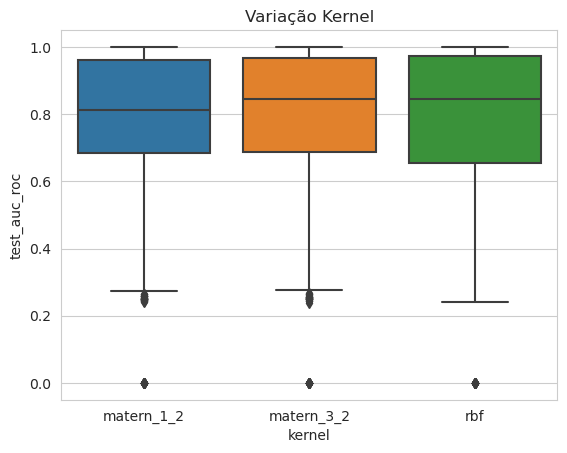

In [73]:
s = sns.boxplot(data=df_normal, y = "test_auc_roc", x = "kernel")
s.set_title("Variação Kernel")
None

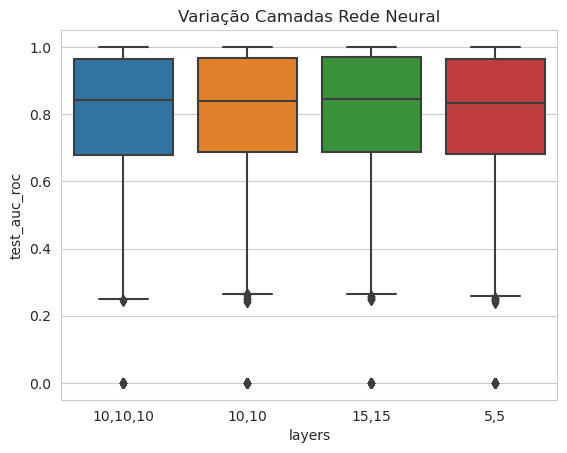

In [74]:
s = sns.boxplot(data=df_normal, y = "test_auc_roc", x = "layers")
s.set_title("Variação Camadas Rede Neural")
None

# Contaminado

In [75]:
df = pd.read_json(
    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_contaminated.json"
)
df.head(5)

,IForest,KNN,CBLOF,PCA,ECOD,GPLVM
0,0.496581,0.557006,0.523200,0.530072,0.512396,0.528844
1,0.826387,0.791137,0.700228,0.692759,0.803716,0.646609
2,0.737342,0.794484,0.812179,0.765127,0.830822,0.829236
3,0.979938,0.950617,0.952787,0.955392,0.987365,0.958767
4,0.696507,0.730743,0.722589,0.724840,0.745071,0.717480


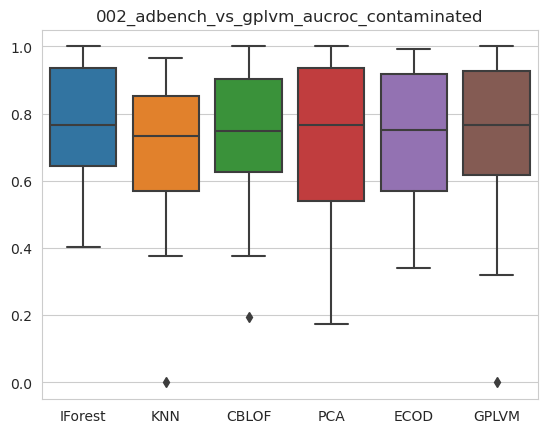

In [76]:
sns.set_style("whitegrid")
s = sns.boxplot(data=df)
s.set_title("002_adbench_vs_gplvm_aucroc_contaminated")
None
#plt.savefig(
#    "experiments/complete/adbench/standard/002_adbench_vs_gplvm_aucroc_contaminated.png"
#)

In [77]:
base = "experiments/complete/adbench/duplicate_anomalies/"


def save_experiment_boxplot(base_path):
    for path in os.listdir(base_path):
        if path.endswith("json"):
            plt.figure()
            df = pd.read_json(base + path)
            s = sns.boxplot(data=df)
            img = path.replace(".json", ".png")
            title = path.replace(".json", "")
            s.set_title(title)
            plt.savefig(base + "images/" + img)


# save_experiment_boxplot(base)

# Anomalias Duplicadas

In [78]:
base = "experiments/complete/adbench/duplicate_anomalies/"
list_dict = []
dict_exp = {}
df_result = pd.DataFrame(data=None)
for path in os.listdir(base):
    if path.endswith("json"):
        with open(base + path, "r") as file:
            exp = json.load(file)
            exp = pd.DataFrame(exp).mean(axis=0).to_dict()
            dict_exp = {path.replace("ad_vs_gp_", "").replace(".json", ""): exp}
            df = pd.DataFrame(dict_exp).T
            df_result = pd.concat([df_result, df])

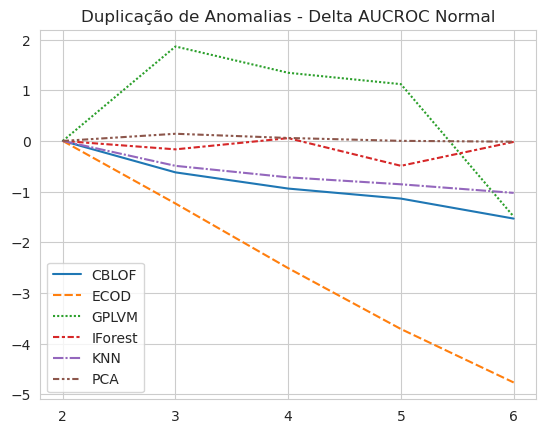

In [79]:
df_normal_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_normal_2",
            "aucroc_normal_3",
            "aucroc_normal_4",
            "aucroc_normal_5",
            "aucroc_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_normal_2": "2",
        "aucroc_normal_3": "3",
        "aucroc_normal_4": "4",
        "aucroc_normal_5": "5",
        "aucroc_normal_6": "6",
    }
)
df_normal_aucroc_delta = df_normal_aucroc.subtract(df_normal_aucroc.iloc[0, :]) * 100
s = sns.lineplot(df_normal_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Normal")
None

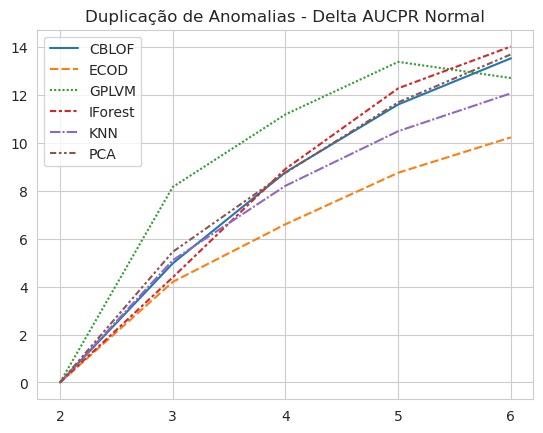

In [19]:
df_normal_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_normal_2",
            "aucpr_normal_3",
            "aucpr_normal_4",
            "aucpr_normal_5",
            "aucpr_normal_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_normal_2": "2",
        "aucpr_normal_3": "3",
        "aucpr_normal_4": "4",
        "aucpr_normal_5": "5",
        "aucpr_normal_6": "6",
    }
)
df_normal_aucpr_delta = df_normal_aucpr.subtract(df_normal_aucpr.iloc[0, :]) * 100
s = sns.lineplot(df_normal_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Normal")
None

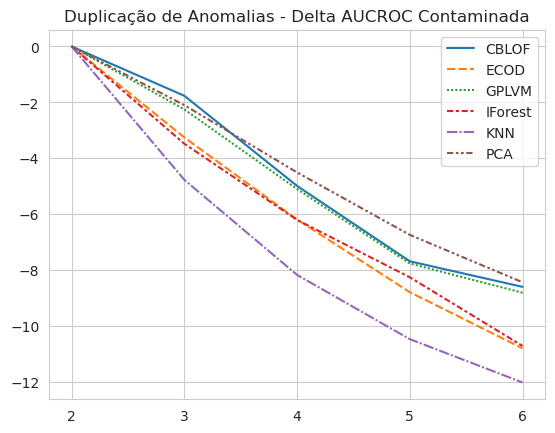

In [20]:
df_contaminated_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_contaminated_2",
            "aucroc_contaminated_3",
            "aucroc_contaminated_4",
            "aucroc_contaminated_5",
            "aucroc_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_contaminated_2": "2",
        "aucroc_contaminated_3": "3",
        "aucroc_contaminated_4": "4",
        "aucroc_contaminated_5": "5",
        "aucroc_contaminated_6": "6",
    }
)
df_contaminated_aucroc_delta = (
    df_contaminated_aucroc.subtract(df_contaminated_aucroc.iloc[0, :]) * 100
)
s = sns.lineplot(df_contaminated_aucroc_delta)
s.set_title("Duplicação de Anomalias - Delta AUCROC Contaminada")
None

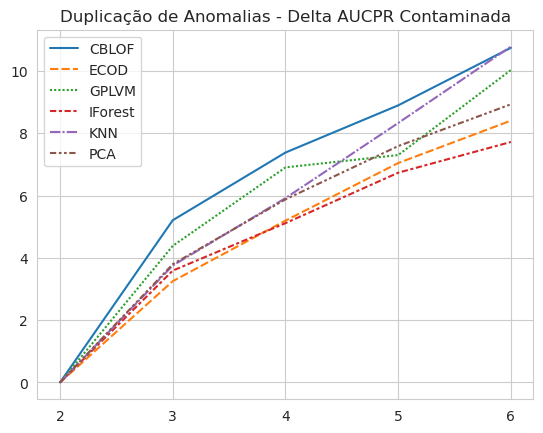

In [21]:
df_contaminated_aucpr = df_result.loc[
    df_result.index.isin(
        [
            "aucpr_contaminated_2",
            "aucpr_contaminated_3",
            "aucpr_contaminated_4",
            "aucpr_contaminated_5",
            "aucpr_contaminated_6",
        ]
    ),
    :,
].rename(
    index={
        "aucpr_contaminated_2": "2",
        "aucpr_contaminated_3": "3",
        "aucpr_contaminated_4": "4",
        "aucpr_contaminated_5": "5",
        "aucpr_contaminated_6": "6",
    }
)
df_contaminated_aucpr_delta = (
    df_contaminated_aucpr.subtract(df_contaminated_aucpr.iloc[0, :]) * 100
)
s = sns.lineplot(df_contaminated_aucpr_delta)
s.set_title("Duplicação de Anomalias - Delta AUCPR Contaminada")
None

# Features Irrelevantes

In [22]:
base = "experiments/complete/adbench/irrelevant_features/"
list_dict = []
dict_exp = {}
df_result = pd.DataFrame(data=None)
for path in os.listdir(base):
    if path.endswith("json"):
        with open(base + path, "r") as file:
            exp = json.load(file)
            exp = pd.DataFrame(exp).mean(axis=0).to_dict()
            dict_exp = {path.replace("ad_vs_gp_", "").replace(".json", ""): exp}
            df = pd.DataFrame(dict_exp).T
            df_result = pd.concat([df_result, df])

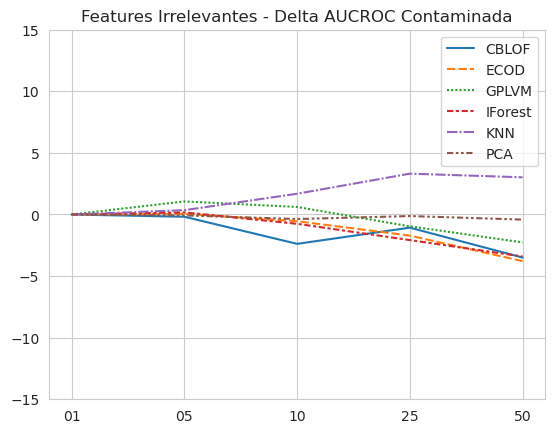

In [23]:
df_contaminated_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_contaminated_1",
            "aucroc_contaminated_5",
            "aucroc_contaminated_10",
            "aucroc_contaminated_25",
            "aucroc_contaminated_50",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_contaminated_1": "01",
        "aucroc_contaminated_5": "05",
        "aucroc_contaminated_10": "10",
        "aucroc_contaminated_25": "25",
        "aucroc_contaminated_50": "50",
    }
)
df_contaminated_aucroc_delta = (
    df_contaminated_aucroc.sort_index().subtract(df_contaminated_aucroc.iloc[0, :])
    * 100
)
s = sns.lineplot(df_contaminated_aucroc_delta)
s.set_ylim([-15, 15])
s.set_title("Features Irrelevantes - Delta AUCROC Contaminada")
None

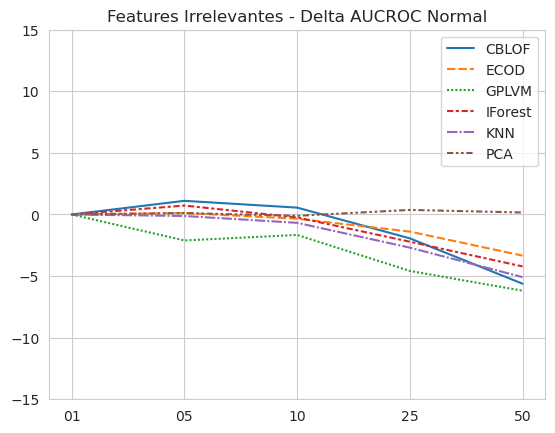

In [24]:
df_normal_aucroc = df_result.loc[
    df_result.index.isin(
        [
            "aucroc_normal_1",
            "aucroc_normal_5",
            "aucroc_normal_10",
            "aucroc_normal_25",
            "aucroc_normal_50",
        ]
    ),
    :,
].rename(
    index={
        "aucroc_normal_1": "01",
        "aucroc_normal_5": "05",
        "aucroc_normal_10": "10",
        "aucroc_normal_25": "25",
        "aucroc_normal_50": "50",
    }
)
df_normal_aucroc_delta = (
    df_normal_aucroc.sort_index().subtract(df_normal_aucroc.iloc[0, :]) * 100
)
s = sns.lineplot(df_normal_aucroc_delta)
s.set_ylim([-15, 15])
s.set_title("Features Irrelevantes - Delta AUCROC Normal")
None

# Epochs

In [25]:
df_5000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_5000.json"
).rename(columns={"GPLVM": "GPLVM_5000"})
# df_1000 = pd.read_json("experiments/complete/gplvm/001_gplvm_contaminated.json")[
#    ["test_auc_roc"]
# ].rename(columns={"test_auc_roc": "GPLVM_1000"})
df_1000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_1000.json"
).rename(columns={"GPLVM": "GPLVM_1000"})
df_0100 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_contaminated_epoch_100.json"
).rename(columns={"GPLVM": "GPLVM_100"})

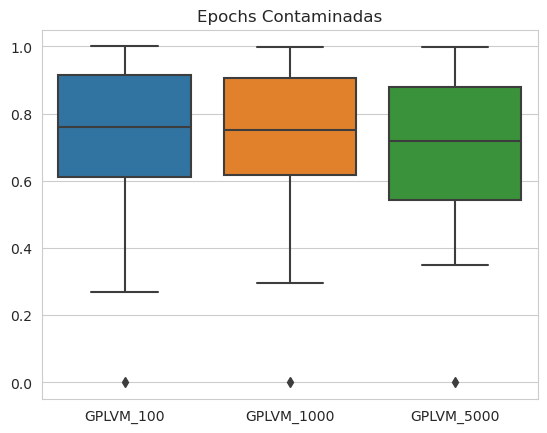

In [26]:
s = sns.boxplot(pd.concat([df_0100, df_1000, df_5000], axis=1))
s.set_title("Epochs Contaminadas")
None

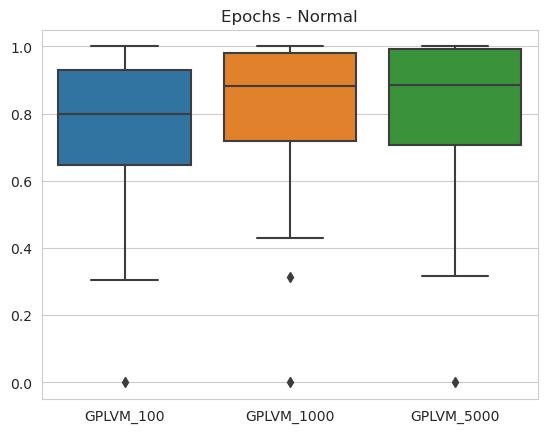

In [27]:
df_5000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_5000.json"
).rename(columns={"GPLVM": "GPLVM_5000"})
df_1000 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_1000.json"
).rename(columns={"GPLVM": "GPLVM_1000"})
df_0100 = pd.read_json(
    "experiments/complete/gplvm/002_gplvm_aucroc_normal_epoch_100.json"
).rename(columns={"GPLVM": "GPLVM_100"})
# df_1000 = pd.read_json("experiments/complete/gplvm/000_gplvm_normal_03_best.json")[
#    ["test_auc_roc"]
# ].rename(columns={"test_auc_roc": "GPLVM_1000"})
s = sns.boxplot(pd.concat([df_0100, df_1000, df_5000], axis=1))
s.set_title("Epochs - Normal")
None

# LOE (ENFIM)

In [28]:
#df_loe[(df_loe.method == "soft") & (df_loe.labeled_anomalies == 1.0)][ "aucroc"].median()
df_loe = utils.read_json_from_folder("experiments/complete/loe/")
df_loe_soft = df_loe[(df_loe.method == "soft")]
df_loe_gt_05 = df_loe[(df_loe.labeled_anomalies >= 0.5)]
df_loe_test_ratio_gt_1 = df_loe[(df_loe.test_ratio > 0 ) ]

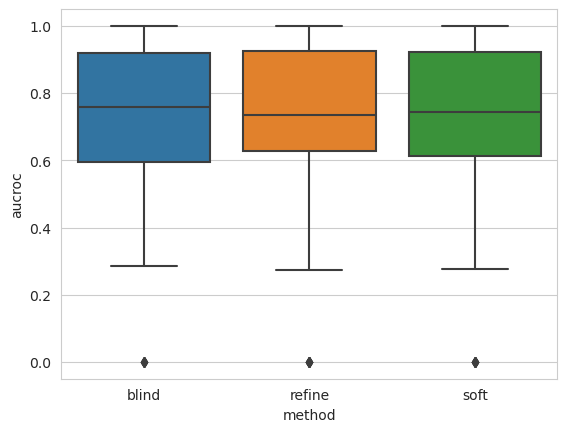

In [29]:
sns.boxplot(df_loe_test_ratio_gt_1, x = "method", y="aucroc")
None

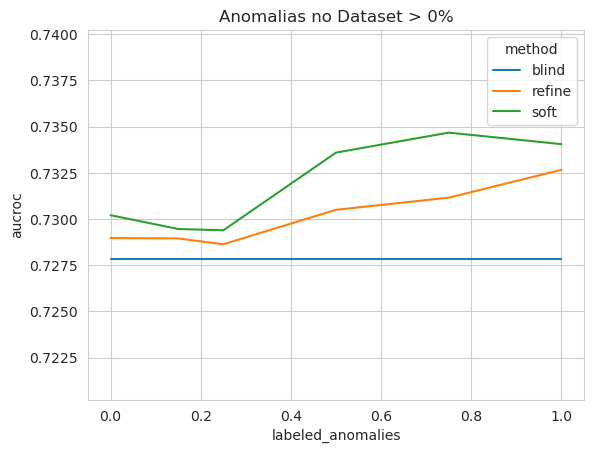

In [30]:
plot_line_aucroc = df_loe_test_ratio_gt_1
s = sns.lineplot(
    data=plot_line_aucroc,
    x="labeled_anomalies",
    y="aucroc",
    hue="method",
    errorbar=None
)
x_i = plot_line_aucroc.aucroc.mean() - 0.01
x_f = plot_line_aucroc.aucroc.mean() + 0.01
s.set_ylim(x_i, x_f)
s.set_title(f"Anomalias no Dataset > 0%")
None

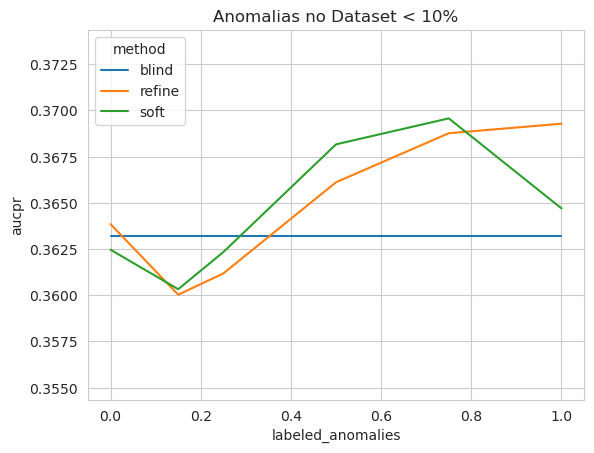

In [31]:
plot_line_aucpr = df_loe_test_ratio_gt_1
s = sns.lineplot(
    data=plot_line_aucpr,
    x="labeled_anomalies",
    y="aucpr",
    hue="method",
    errorbar=None
)
x_i = plot_line_aucpr.aucpr.mean() - 0.01
x_f = plot_line_aucpr.aucpr.mean() + 0.01
s.set_ylim(x_i, x_f)
s.set_title(f"Anomalias no Dataset < 10%")
None